# Notes
## The csv files need to be downloaded first, and change their corresponding path.
## Please note that the hyperparameters presented in this example are for illustrative purposes only.

In [1]:
from src.model import *
from src.train import *

In [2]:
df1_file='./full_bins_features.csv'
df2_file='./Biolip_train_val_test_info.csv'





In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import pandas as pd

import pandas as pd
import numpy as np


lr=0.0005
batch_size=512

# num_epochs=1000
# patience=1000


num_epochs=20
patience=20


dropout=0.0


# df1=pd.read_csv('/vast/xd638/TopLap_interface/TopLap_combine_features/full_bins_features.csv')
df1=pd.read_csv(df1_file)



df_train=df1[df1['data_class']!='test']



############################################################################################################
identical_columns_count = sum(df_train.nunique() == 1)

print(f"Number of columns with all identical values: {identical_columns_count}")
#####


identical_columns =df_train.columns[df_train.nunique() == 1]

# Print the names of these columns
print("Columns with all identical values:", identical_columns.tolist())

# Remove these columns from the DataFrame
df1= df1.drop(columns=identical_columns)
################################################################################################################
# df2=pd.read_csv('/vast/xd638/TopLap_interface/SinglePPD_TopLap_scripts/Biolip_all_features_actually_generated_2591_natural_noncyclic_full_structures_labeled_136000_no_benchmark_strict1to1.csv')


df2=pd.read_csv(df2_file)


df2=df2[['pdb_id','af_model_id','af_confidence','pdb2sql_DockQ','data_class']]

df1=pd.merge(df1,df2,on=['pdb_id','af_model_id','pdb2sql_DockQ','data_class'],how='inner')


df1_for_eval=df1
print(df1.shape)



df_train=df1[df1['data_class']=='train']


df_val=df1[df1['data_class']=='valid']
df_test=df1[df1['data_class']=='test']

################################################################################################################


list_train=list(set(df_train['pdb_id'].to_list()))
list_val=list(set(df_val['pdb_id'].to_list()))
list_test=list(set(df_test['pdb_id'].to_list()))
print(len(list_train),len(list_val),len(list_test))
for i in list_train:
    if (i in list_val) or (i in list_test):
        print(i)
for i in list_test:
    if (i in list_val) or (i in list_train):
        print(i)

################################################################################################################
import numpy as np
filtration_values = [f"{x:.1f}" if x.is_integer() else f"{x:.2f}".rstrip("0") for x in np.arange(2.0, 10.25, 0.25)]
filtration_values
# Generate persistent feature names for each filtration value
persistent_features = []
for filtration in filtration_values:
    persistent_features += [f"persistent_{filtration}_{str(i+1).zfill(2)}" for i in range(72)]  # Adjust 72 to the actual count if different

# Generate static feature names
static_features = [f"static_{str(i+1).zfill(2)}" for i in range(378)]  # Adjust 378 to the actual count if different

# Combine both lists
combined_feature_name_list = persistent_features + static_features


feature_name_list=[
                


                   'pdb2sql_DockQ'] +combined_feature_name_list

valid_columns = [col for col in feature_name_list if col in df_train.columns]

################################################################################################################


# Subset the DataFrame with the valid columns
df_train = df_train[valid_columns]
df_val = df_val[valid_columns]
df_test = df_test[valid_columns]

print(df_train.shape,df_val.shape,df_test.shape)


####
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


def get_features_and_target(df):
    y = df['pdb2sql_DockQ'].values  # Select the 'pdb2sql_DockQ' column as the target
    X = df.drop(columns=['pdb2sql_DockQ']).values  # Drop the 'pdb2sql_DockQ' column to get the features
    return X, y


import numpy as np
import pandas as pd
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

Number of columns with all identical values: 108
Columns with all identical values: ['persistent_7.25_01', 'persistent_7.25_09', 'persistent_7.25_17', 'persistent_7.25_25', 'persistent_7.25_33', 'persistent_7.25_41', 'persistent_7.25_49', 'persistent_7.25_57', 'persistent_7.25_65', 'persistent_7.5_01', 'persistent_7.5_09', 'persistent_7.5_17', 'persistent_7.5_25', 'persistent_7.5_33', 'persistent_7.5_41', 'persistent_7.5_49', 'persistent_7.5_57', 'persistent_7.5_65', 'persistent_7.75_01', 'persistent_7.75_09', 'persistent_7.75_17', 'persistent_7.75_25', 'persistent_7.75_33', 'persistent_7.75_41', 'persistent_7.75_49', 'persistent_7.75_57', 'persistent_7.75_65', 'persistent_8.0_01', 'persistent_8.0_09', 'persistent_8.0_17', 'persistent_8.0_25', 'persistent_8.0_33', 'persistent_8.0_41', 'persistent_8.0_49', 'persistent_8.0_57', 'persistent_8.0_65', 'persistent_8.25_01', 'persistent_8.25_09', 'persistent_8.25_17', 'persistent_8.25_25', 'persistent_8.25_33', 'persistent_8.25_41', 'persiste

In [4]:
def RMSELoss(y_pred, y_true):
    """Root Mean Squared Error (RMSE) loss."""
    return torch.sqrt(nn.functional.mse_loss(y_pred, y_true))


Epoch 1: Train RMSE: 0.6976505036905585, Train PCC: 0.15929575264453888, Validation RMSE: 0.2483191192150116, Validation PCC: 0.6730818152427673
Validation loss improved; model saved at epoch 1
Validation PCC improved; model saved at epoch 1
Epoch 2: Train RMSE: 0.18956020902361126, Train PCC: 0.8139429688453674, Validation RMSE: 0.2135896533727646, Validation PCC: 0.734951376914978
Validation loss improved; model saved at epoch 2
Validation PCC improved; model saved at epoch 2
Epoch 3: Train RMSE: 0.1610945730895144, Train PCC: 0.8675143122673035, Validation RMSE: 0.18831562995910645, Validation PCC: 0.7824617028236389
Validation loss improved; model saved at epoch 3
Validation PCC improved; model saved at epoch 3
Epoch 4: Train RMSE: 0.1355860446091444, Train PCC: 0.9062551856040955, Validation RMSE: 0.1992381364107132, Validation PCC: 0.7727711200714111
Epoch 5: Train RMSE: 0.12925895115359318, Train PCC: 0.9159921407699585, Validation RMSE: 0.21505166590213776, Validation PCC: 0.76

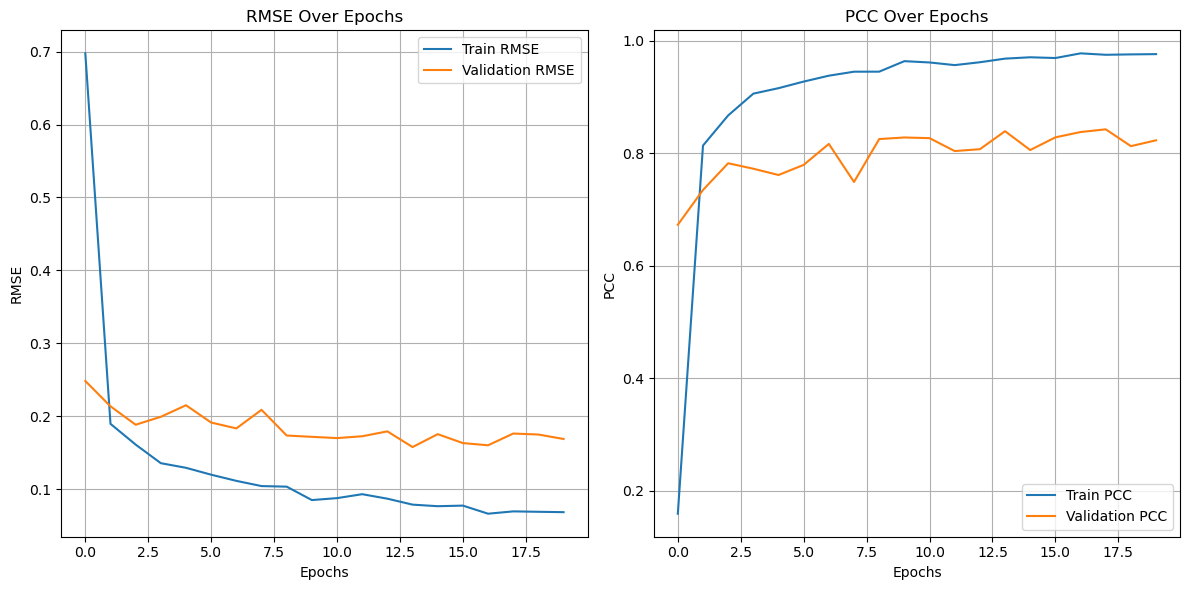

In [5]:
####
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim

# Extract features and targets
X_train, y_train = get_features_and_target(df_train)
X_val, y_val = get_features_and_target(df_val)
X_test, y_test = get_features_and_target(df_test)



from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)



# Convert arrays to PyTorch tensors and create datasets
train_data = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
val_data = TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.float32))
test_data = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32))

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=1000000)
test_loader = DataLoader(test_data, batch_size=1000000)

####

input_dim = 2646
neurons1 = 2048     
neurons2 = 2048  
neurons3 = 2048 
neurons4 = 2048 

dropout = dropout   


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Initialize model
model =TopoDockQ(input_dim, neurons1, neurons2, neurons3, neurons4,dropout).to(device)


        
        
# Set up optimizer with Adam
optimizer = optim.Adam(model.parameters(), lr=lr, eps=1e-08, amsgrad=False)  # Using Adam optimizer

# Set up learning rate scheduler
r_adjust = optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.1, last_epoch=-1)

# Train and evaluate the model
train_losses, val_losses, train_pccs, val_pccs= train_and_evaluate(
    model, train_loader, val_loader, optimizer, lr_scheduler=r_adjust,
    num_epochs=num_epochs, patience=patience, model_save_path="example_MLP_best_model.pth", pcc_model_save_path="example_MLP_best_pcc_model.pth"
)

                
##

torch.save(model.state_dict(), './example_MLP_1000epoch.pth')
                